# Problems - Information Retrieval and Recommender Systems

##  Information Retrieval - an online shop

Your online shop, sells 80 different products. You recently contracted a company to implement a "search" functionality for your shop. The company has just delivered their new retrieval system, and you are now testing it out.

You try the system, with a specific query, and the system displays the 10 products with the following IDs on the first page:

In [1]:
import numpy as np

result = np.array([ 2, 20, 36, 41, 44,  6, 71, 79, 78,  9])

You know that for the query you tried out, the relevant products are the ones with ids:

In [2]:
relevant_idx = np.array([ 2,  3,  5,  9, 14, 20, 36, 38, 39, 44, 48, 54, 58, 71, 75, 77, 78])
print(len(relevant_idx))

17


<font color=blue> How many relevant items did the system return? </font>

In [5]:
relevant_items = []
for item in result:
  if item in relevant_idx:
    relevant_items.append(item)
print("Relevant items for the system output: ",relevant_items)
print("Number of relevant items: ",len(relevant_items))

Relevant items for the system output:  [2, 20, 36, 44, 71, 78, 9]
Number of relevant items:  7


</br>

<font color=blue> What is the Precision, Recall and F1-score values for the above query? </font>

Remember:

$P = \frac{\lvert ret \cap rel \rvert}{ret}$

$R = \frac{\lvert ret \cap rel \rvert}{rel}$

$F = \frac{2 P R}{P + R}$

In [7]:
precision = recall = f1 = 0
tp = len(relevant_items)
precision = tp / len(result)
recall = tp / len(relevant_idx)
f1 = 2*precision*recall / (precision+recall)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 score: ",f1)

Precision:  0.7
Recall:  0.4117647058823529
F1 score:  0.5185185185185185


The retrieval system only displays the ten best products on the first page, but internally it has scored all the products in the database against the query. For the same query as before, the scores for all 80 products that the system has calculated are given in the list below. The higher the number, the better it matches the query.

In [8]:
scores = np.array([76.25960904, 37.2712716 , 97.43522538, 85.2135435 , 38.42166524,
       59.33358171, 90.84382517, 34.59173848, 53.24126568, 87.80759099,
       71.13477237, 52.24501123, 53.84857359, 72.34145019, 82.60724712,
       60.13854056, 50.02218001, 67.69020948, 49.20740763, 48.19740307,
       97.26734714, 33.43817817, 46.61489   , 45.70630798, 12.03883746,
       43.71217679, 66.03930779, 76.31438734, 10.98192963, 29.80459484,
       14.7397168 , 21.48280983, 39.81730095, 28.18530124, 36.35538331,
       55.10834932, 95.5515258 , 13.10765296, 86.70784949, 81.82826684,
       55.79913761, 94.58702549, 79.3577133 , 72.84811652, 92.9954021 ,
       78.36304059, 62.00806942, 16.43752292, 83.44531762, 82.46218716,
       10.26819206, 64.56747866, 61.1888231 , 11.73771   , 36.15240615,
       63.08775437, 18.5772151 , 15.75830887, 40.75549881, 68.84171716,
       16.72596633, 57.49016213, 51.46845883, 23.56191592, 43.31518323,
       74.93840142, 25.68485212, 26.20211702, 27.50582533, 63.53842237,
       28.30218436, 89.65913426, 31.90662515, 41.68472171, 69.13468994,
       36.35852244, 19.61632789, 79.82716108, 88.39815675, 88.55666924])

</br>

<font color=blue> Can you calculate the Precision and Recall if you displayed 20 or 40 products on the first page? </font>

> Note 1: This is what we would call P@20, R@20, P@40, R@40.

> Note 2: Have a look at the Numpy function `argsort()` to solve this problem  ( https://numpy.org/doc/1.18/reference/generated/numpy.argsort.html ).

In [13]:
sorted_idx = (-scores).argsort()
sorted_idx_20 = sorted_idx[:20]
sorted_idx_40 = sorted_idx[:40]

relevant_items_20 = []
relevant_items_40 = []

for item in sorted_idx_20:
  if item in relevant_idx:
    relevant_items_20.append(item)

for item in sorted_idx_40:
  if item in relevant_idx:
    relevant_items_40.append(item)

precision_20 = len(relevant_items_20) / 20
recall_20 = len(relevant_items_20) / len(relevant_idx)
f1_20 = 2*precision_20*recall_20/(precision_20+recall_20)

precision_40 = len(relevant_items_40) / 40
recall_40 = len(relevant_items_40) / len(relevant_idx)
f1_40 = 2*precision_40*recall_40/(precision_40+recall_40)

print("Precision @ 20: ",precision_20)
print("Recall @ 20: ",recall_20)
print("F1 score @ 20: ",f1_20)

print("Precision @ 40: ",precision_40)
print("Recall @ 40: ",recall_40)
print("F1 score @ 40: ",f1_40)

Precision @ 20:  0.65
Recall @ 20:  0.7647058823529411
F1 score @ 20:  0.7027027027027027
Precision @ 40:  0.35
Recall @ 40:  0.8235294117647058
F1 score @ 40:  0.4912280701754386


</br>

<font color=blue> In order to get an overall idea about how good the retrieval is, draw the Precision/Recall plot </font>

In [16]:
precision = []
recall = []
count = 0
for id,item in enumerate(sorted_idx):
  if item in relevant_idx:
    count+=1
  precision.append(count/(id+1))
  recall.append(count/len(relevant_idx))

print(precision)
print(recall)


[1.0, 1.0, 1.0, 0.75, 0.8, 0.6666666666666666, 0.7142857142857143, 0.625, 0.6666666666666666, 0.7, 0.7272727272727273, 0.75, 0.7692307692307693, 0.7857142857142857, 0.7333333333333333, 0.75, 0.7647058823529411, 0.7222222222222222, 0.6842105263157895, 0.65, 0.6190476190476191, 0.5909090909090909, 0.5652173913043478, 0.5416666666666666, 0.52, 0.5, 0.48148148148148145, 0.4642857142857143, 0.4482758620689655, 0.43333333333333335, 0.41935483870967744, 0.40625, 0.3939393939393939, 0.38235294117647056, 0.37142857142857144, 0.3888888888888889, 0.3783783783783784, 0.3684210526315789, 0.358974358974359, 0.35, 0.34146341463414637, 0.3333333333333333, 0.32558139534883723, 0.3181818181818182, 0.3111111111111111, 0.30434782608695654, 0.2978723404255319, 0.2916666666666667, 0.2857142857142857, 0.28, 0.27450980392156865, 0.28846153846153844, 0.2830188679245283, 0.2777777777777778, 0.2727272727272727, 0.2857142857142857, 0.2807017543859649, 0.29310344827586204, 0.288135593220339, 0.2833333333333333, 0.

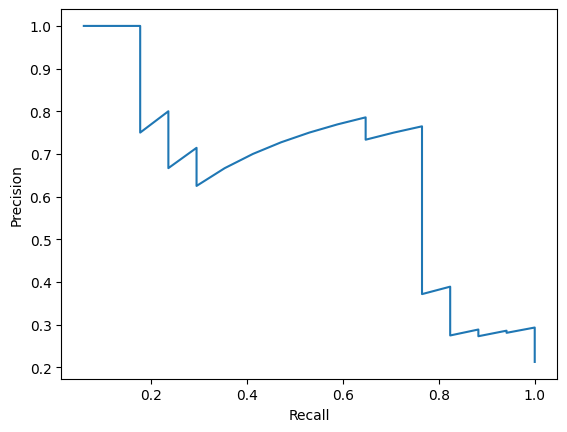

In [17]:
import matplotlib.pyplot as plt

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

</br>

<font color=blue> Now calculate the Average Precision value. </font>

<i> Remember: </i>

$AP = \displaystyle\sum_{k=1}^{N} P(k) \Delta R(k)$

or

$AP = \displaystyle \frac{\sum_{k=1}^{N} P(k) rel(k)}{|rel|}$

In [18]:
recall = [0] + recall
AP = 0
for i in range(1,len(precision)+1):
  AP +=precision[i-1]*(recall[i]-recall[i-1])

print("AP: ",AP)

AP:  0.6872967180508048


## Recommender Systems

You are working on a movie recommendation system, and you have been given the following ratings table.

Each row corresponds to a user, and each column to a movie. Ratings are between 1 and 5 stars, while a rating equal to `None` (NaN) means that the user has not rated that particular movie.

In [38]:
import pandas as pd

In [39]:
ratings = pd.read_csv("ratings.csv", index_col = 0)
ratings

,Movie 0,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5,Movie 6,Movie 7,Movie 8,Movie 9,Movie 10,Movie 11,Movie 12,Movie 13,Movie 14
User 0,4.0,1.0,5,2.0,4.0,5,NaN,1.0,3.0,1.0,5.0,1.0,5.0,NaN,NaN
User 1,5.0,1.0,3,5.0,1.0,2,4.0,3.0,NaN,NaN,5.0,1.0,4.0,1.0,NaN
User 2,1.0,NaN,1,NaN,5.0,1,5.0,4.0,2.0,1.0,1.0,NaN,4.0,1.0,2.0
User 3,NaN,1.0,3,1.0,NaN,1,3.0,4.0,4.0,NaN,5.0,3.0,2.0,NaN,4.0
User 4,3.0,3.0,4,2.0,NaN,2,4.0,1.0,4.0,NaN,NaN,3.0,NaN,NaN,NaN
User 5,4.0,NaN,1,2.0,2.0,4,2.0,1.0,2.0,1.0,5.0,3.0,5.0,3.0,4.0
User 6,2.0,4.0,3,2.0,1.0,2,NaN,NaN,3.0,NaN,5.0,5.0,NaN,NaN,NaN
User 7,5.0,5.0,5,4.0,4.0,4,2.0,1.0,NaN,1.0,4.0,3.0,5.0,3.0,3.0
User 8,5.0,1.0,3,NaN,1.0,4,5.0,4.0,NaN,4.0,5.0,NaN,1.0,NaN,NaN
User 9,2.0,3.0,1,5.0,3.0,1,4.0,1.0,1.0,2.0,5.0,NaN,4.0,NaN,5.0


In addition, you are given the following ratings that another user has made for the same movies.

In [40]:
target = pd.read_csv("target.csv", header = 0, index_col=0)
target = target.squeeze()
target

Movie 0     1.0
Movie 1     NaN
Movie 2     NaN
Movie 3     2.0
Movie 4     4.0
Movie 5     NaN
Movie 6     1.0
Movie 7     4.0
Movie 8     NaN
Movie 9     NaN
Movie 10    NaN
Movie 11    NaN
Movie 12    NaN
Movie 13    3.0
Movie 14    5.0
Name: 0, dtype: float64

You are asked to predict the ratings for the movies that the target user has not seen yet, that is for the movies that have a rating of zero in the target user array.

First, we will calculate the similarity between the target user and each of the users in our ratings table. We will then use the 3 most similar users to derive recommendations.

To calculate similarity between users, we will use the Pearson correlation formula:

$sim(a, b) = \frac{\sum_{p \in P} (r_{a,p}-\hat{r_a}) (r_{b,p}-\hat{r_b}) }{\sqrt{\sum_{p \in P} (r_{a,p}-\hat{r_a})^2} \sqrt{\sum_{p \in P} (r_{b,p}-\hat{r_b})^2} }$

where a and b are users, and P is the set of the items for which BOTH users have provided ratings.

Luckily, pandas has a function for calculating correlation: `DataFrame.corrwith()`. This will calculate the correlation between the target series and every row of the ratings dataframe if we specify that `axis = 1` (row-wise).

> See the docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corrwith.html?highlight=corrwith#pandas.DataFrame.corrwith

In [41]:
similarity = ratings.corrwith(target, axis = 1, method = 'pearson') # This function calculates everything based on common items (e.g. mean of user is calculated based only on the common items with that other user we correlate with)
similarity

User 0   -0.333333
User 1   -0.751237
User 2    0.062994
User 3    0.645497
User 4   -0.912871
User 5   -0.040032
User 6   -0.944911
User 7   -0.303697
User 8   -0.762493
User 9    0.023702
dtype: float64

In order to predict accurate preferences, we should only take into account users that have a minimum number of items in common to our target user. This minimum is up to us to define (depends on your data and your application).

First, we need to count count how many items each user has in common with our target user.

We can calculate this using boolean logic. First we check for which items we have ratings (True) and for which no (False). Then we check for which items we have True in both the ratings data frame AND the target series. Then it is a matter of summing up how many True values we have in every row. This is summarised below, although it would be easier to understand if you do the calculations step by step and print out the result.

In [42]:
# Find how many items do they have in common

commonItems = (~ratings.isna()) & (~target.isna())
print(commonItems)
nCommon = commonItems.sum(axis = 1)
nCommon

        Movie 0  Movie 1  Movie 2  Movie 3  Movie 4  Movie 5  Movie 6  \
User 0     True    False    False     True     True    False    False   
User 1     True    False    False     True     True    False     True   
User 2     True    False    False    False     True    False     True   
User 3    False    False    False     True    False    False     True   
User 4     True    False    False     True    False    False     True   
User 5     True    False    False     True     True    False     True   
User 6     True    False    False     True     True    False    False   
User 7     True    False    False     True     True    False     True   
User 8     True    False    False    False     True    False     True   
User 9     True    False    False     True     True    False     True   

        Movie 7  Movie 8  Movie 9  Movie 10  Movie 11  Movie 12  Movie 13  \
User 0     True    False    False     False     False     False     False   
User 1     True    False    False     Fals

User 0    4
User 1    6
User 2    6
User 3    4
User 4    4
User 5    7
User 6    3
User 7    7
User 8    4
User 9    6
dtype: int64

We can now get the indices of the users that have more than 3 items with the target. This should drop User 6 in this case who only has exactly 3 items in common with the target.

In [43]:
minItemsCommon = 3

# Get the indices of users with whom we have more than minItemsCommon items in common with the query one
idx = nCommon.index[nCommon > minItemsCommon]
print (idx)

#keep only the users that have more than minItemsCommon with the query
similarity = similarity.loc[idx]
similarity

Index(['User 0', 'User 1', 'User 2', 'User 3', 'User 4', 'User 5', 'User 7',
       'User 8', 'User 9'],
      dtype='object')


User 0   -0.333333
User 1   -0.751237
User 2    0.062994
User 3    0.645497
User 4   -0.912871
User 5   -0.040032
User 7   -0.303697
User 8   -0.762493
User 9    0.023702
dtype: float64

Now, let's find the 3 most similar users in the remaining ones. We can do that by sorting the similarities series (from smaller to larger) and keeping the last three entries. We can do this using the `sort_values()` function of pandas.

> See the documentation here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

In [44]:
topN = 3

similarity.sort_values(ascending = False, inplace = True)
idx = similarity.index[:topN] # get the indices of the top N most similar users
idx

Index(['User 3', 'User 2', 'User 9'], dtype='object')

Now that we have the most similar users, we can use their ratings to derive ratings for the target user. To combine the ratings of the most similar users we will use the formula:

$ pred(a, i) = \hat{r_a} + \frac{\sum_{b \in N} sim(a, b) (r_{b,i} - \hat{r_b})}{\sum_{b \in N} sim(a,b)} $

where a and i are the user and item for which we want to predict a rating, and N is the set of similar users we have identified.

For example, if we wanted to derive the rating for the Movie 2 (`target["Movie 2"]`), we would combine ratings in the following way:

In [45]:
m = "Movie 2" #The movie we are interested in predicting a rating for

# initialise two variables in which we will hold the sums of the nominator and the demoninator of our formula
sum_nom = sum_denom = 0

# Loop through the list of similar users
for u in idx:
    user_ratings = ratings.loc[u] # the row of ratings corresponding to user u
    print("\nuser:", u, "Similarity: ", similarity[u])

    # Only use the users that have rated the movie we are interested in
    if ~(user_ratings.isna()[m]):
        print("Has seen the movie:", m)
        print("Gave it a rating of: ", user_ratings[m])
        mu = user_ratings.mean() # Calculate the mean rating of the user, this is based only on movies that have a rating != NaN
        print("Mean: ", mu)
        sum_nom = sum_nom + similarity[u]*(user_ratings[m] - mu) # Nominator
        sum_denom = sum_denom + similarity[u] # Denominator
    else:
        print("Has not seen the movie. Ignore.")

if sum_denom != 0: # Check if at least one of the similar users had rated the movie in question, otherwise our denominator would be equal to 0
    target[m] = target.mean() + sum_nom / sum_denom

print("\nThe predicted ratings of the target user are: \n", target)


user: User 3 Similarity:  0.6454972243679027
Has seen the movie: Movie 2
Gave it a rating of:  3.0
Mean:  2.8181818181818183

user: User 2 Similarity:  0.06299407883487121
Has seen the movie: Movie 2
Gave it a rating of:  1.0
Mean:  2.3333333333333335

user: User 9 Similarity:  0.02370227315699886
Has seen the movie: Movie 2
Gave it a rating of:  1.0
Mean:  2.8461538461538463

The predicted ratings of the target user are: 
 Movie 0     1.000000
Movie 1          NaN
Movie 2     2.842957
Movie 3     2.000000
Movie 4     4.000000
Movie 5          NaN
Movie 6     1.000000
Movie 7     4.000000
Movie 8          NaN
Movie 9          NaN
Movie 10         NaN
Movie 11         NaN
Movie 12         NaN
Movie 13    3.000000
Movie 14    5.000000
Name: 0, dtype: float64


<font color=blue> Do the same for all the movies that the target user has not rated yet. </font>

In [46]:
# YOUR CODE HERE
non_rated = []
for m in range(len(target)):
  if target.isna()[m]:
    non_rated.append("Movie "+ str(m))

print(non_rated)

['Movie 1', 'Movie 5', 'Movie 8', 'Movie 9', 'Movie 10', 'Movie 11', 'Movie 12']


In [47]:
print(target.mean())

2.85536958698305


In [48]:
for m in non_rated:
  sum_nom = sum_denom = 0

  # Loop through the list of similar users
  for u in idx:
      user_ratings = ratings.loc[u] # the row of ratings corresponding to user u
      print("\nuser:", u, "Similarity: ", similarity[u])

      # Only use the users that have rated the movie we are interested in
      if ~(user_ratings.isna()[m]):
          print("Has seen the movie:", m)
          print("Gave it a rating of: ", user_ratings[m])
          mu = user_ratings.mean() # Calculate the mean rating of the user, this is based only on movies that have a rating != NaN
          print("Mean: ", mu)
          sum_nom = sum_nom + similarity[u]*(user_ratings[m] - mu) # Nominator
          sum_denom = sum_denom + similarity[u] # Denominator
      else:
          print("Has not seen the movie. Ignore.")

  if sum_denom != 0: # Check if at least one of the similar users had rated the movie in question, otherwise our denominator would be equal to 0
      target[m] = target.mean() + sum_nom / sum_denom

  print("\nThe predicted ratings of the target user are: \n", target)


user: User 3 Similarity:  0.6454972243679027
Has seen the movie: Movie 1
Gave it a rating of:  1.0
Mean:  2.8181818181818183

user: User 2 Similarity:  0.06299407883487121
Has not seen the movie. Ignore.

user: User 9 Similarity:  0.02370227315699886
Has seen the movie: Movie 1
Gave it a rating of:  3.0
Mean:  2.8461538461538463

The predicted ratings of the target user are: 
 Movie 0     1.000000
Movie 1     1.107035
Movie 2     2.842957
Movie 3     2.000000
Movie 4     4.000000
Movie 5          NaN
Movie 6     1.000000
Movie 7     4.000000
Movie 8          NaN
Movie 9          NaN
Movie 10         NaN
Movie 11         NaN
Movie 12         NaN
Movie 13    3.000000
Movie 14    5.000000
Name: 0, dtype: float64

user: User 3 Similarity:  0.6454972243679027
Has seen the movie: Movie 5
Gave it a rating of:  1.0
Mean:  2.8181818181818183

user: User 2 Similarity:  0.06299407883487121
Has seen the movie: Movie 5
Gave it a rating of:  1.0
Mean:  2.3333333333333335

user: User 9 Similarity:  